## Import Libraries for Analysis

In [20]:
# Import Core Libraries
import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Import Metric & Preprocessing Libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate

# Import Machine Learning Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


# Set Theme for graphs
sns.set_theme(palette='bright')

### Self-Made Functions

In [21]:
def infoOut(data):
    '''
    Title: Display Dataframe of df.info
    Description: Display a pandas dataframe of df.info

    data: Pandas dataframe.
    '''
    dfInfo = data.columns.to_frame(name='Column')   # Create dataframe         
    dfInfo['Non-Null Count'] = data.notna().sum()   # Add non-null counts to dataframe
    dfInfo['NULL Count'] = data.isnull().sum()      # Add NULL counts to dataframe        
    dfInfo['Dtype'] = data.dtypes                   # add dtype to dataframe
    dfInfo.reset_index(drop=True,inplace=True)      # Reset index        
    return dfInfo                                   # display info dataframe

def nullValues(data):
    '''
    Title: Display Null values in Pandas Dataframe
    Description: Display a pandas dataframe of Null values for each column
    
    data: Pandas dataframe.
    '''
    display(data.isnull().sum().to_frame().rename(columns = {0:'NULL Amounts'}))

## Data Overview

In [22]:
# Create DataFrame to Hold data
stl_county_df = pd.read_csv('STL-County-2023.csv', low_memory=False)
stl_city_df = pd.read_csv('STL-City-2023.csv', low_memory=False)
stl_census_df = pd.read_csv('STL-Census-2023.csv', low_memory=False)

# Show DataFrame Head
print('St.Louis County')
print('-' * 20)
display(stl_county_df.head(3))

# Show DataFrame Head
print('\n\nSt. Louis City')
print('-' * 20)
display(stl_city_df.head(3))

# Show Census Data
print('\n\nSt.Louis Census')
print('-'*20)
display(stl_census_df.head(3))

St.Louis County
--------------------


OffenseName OffenseCategory Report Number  \
0  Destruction/Damage/Vandalism Of Property        Property         3-431   
1  Destruction/Damage/Vandalism Of Property        Property          23-1   
2  Destruction/Damage/Vandalism Of Property        Property          23-1   

     reportingJuris          forJuris                  address   latitude  \
0  RICHMOND HEIGHTS  RICHMOND HEIGHTS         1107 EAST LINDEN  38.633600   
1      MOLINE ACRES      MOLINE ACRES          2352 GARDNER DR  38.749906   
2         LAKESHIRE         LAKESHIRE  10080 SQUIRE MEADOWS DR  38.536756   

   longitude  dtCalledIntoCad   occurred OccDOW  OccMonth  \
0 -90.342300  2/27/2023 18:08  2/26/2003    Wed         2   
1 -90.247051    1/1/2023 0:04   1/1/2023    Sun         1   
2 -90.341975   1/2/2023 11:31   1/2/2023    Mon         1   

                 premise  zone    district  
0                 CHURCH  3212  DISTRICT 3  
1              RESIDENCE  1133         NaN  
2  APARTMENT PARKING LOT  3422         NaN



St. Louis City
--------------------


inci_id    date_inc time_inc  \
0  23000004  2023-01-01  21:00.0   
1  23000004  2023-01-01  21:00.0   
2  23000007  2023-01-01  10:00.0   

                                             offense nibrs_grp nibrs_code  \
0  UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...         A        520   
1                       PROPERTY DAMAGE - 2ND DEGREE         A        290   
2                      ASSAULT 1ST DEGREE OR ATTEMPT         A        13A   

  beat  district neighborhood   latitude  longitude       incidentlocation  \
0  524       5.0           38  38.646434  -90.26485          2 PORTLAND PL   
1  524       5.0           38  38.646434  -90.26485          2 PORTLAND PL   
2  425       4.0           60  38.652984  -90.20108  3001 N FLORISSANT AVE   

  locationStreet2_Apt         city state  zip  
0                 NaN  Saint Louis    MO  NaN  
1                 NaN  Saint Louis    MO  NaN  
2                 NaN  Saint Louis    MO  NaN



St.Louis Census
--------------------


Fact St.Louis County  \
0        Population estimates, July 1, 2023, (V2023)             NaN   
1        Population Estimates, July 1, 2022, (V2022)         990,414   
2  Population estimates base, April 1, 2020, (V2023)             NaN   

  St.Louis City  
0           NaN  
1       286,578  
2           NaN

### Data Information

In [23]:
### Data Information
# Show St.Louis County
print('St.Louis County')
print('-' * 20)
display(infoOut(stl_county_df))

# Show St.Louis City
print('\n\n\nSt. Louis City')
print('-' * 20)
display(infoOut(stl_city_df))

# Show St.Louis Census Data
print('\n\nSt.Louis Census')
print('-'*20)
display(infoOut(stl_census_df))

St.Louis County
--------------------


Column  Non-Null Count  NULL Count    Dtype
0       OffenseName           35140           0   object
1   OffenseCategory           35140           0   object
2     Report Number           35140           0   object
3    reportingJuris           35140           0   object
4          forJuris           35140           0   object
5           address           34681         459   object
6          latitude           34681         459  float64
7         longitude           34681         459  float64
8   dtCalledIntoCad           35140           0   object
9          occurred           35140           0   object
10           OccDOW           35140           0   object
11         OccMonth           35140           0    int64
12          premise           35140           0   object
13             zone           35140           0   object
14         district           28438        6702   object




St. Louis City
--------------------


Column  Non-Null Count  NULL Count    Dtype
0               inci_id           56532           0    int64
1              date_inc           56532           0   object
2              time_inc           56532           0   object
3               offense           56532           0   object
4             nibrs_grp           56531           1   object
5            nibrs_code           56532           0   object
6                  beat           56532           0   object
7              district           56532           0  float64
8          neighborhood           56532           0   object
9              latitude           56266         266  float64
10            longitude           56266         266  float64
11     incidentlocation           56532           0   object
12  locationStreet2_Apt            9637       46895   object
13                 city           56532           0   object
14                state           56532           0   object
15                  zip           22146       34386   object



St.Louis Census
--------------------


Column  Non-Null Count  NULL Count   Dtype
0             Fact              66           0  object
1  St.Louis County              63           3  object
2    St.Louis City              63           3  object

## Data Preprocessing

### St. Louis City 

#### Map NIBRS Data to DataFrames

##### Mapping Objectives-
* First we need to map the NIBRS codes to the actual Offense description. As we saw above in the Data Overview section that we have different names for Offenses. So by using the NIBRS-Offense-Codes document we can map the NIBRS codes that the STL City dataset has to the actual Description that is used in the documentation! :-O
* We also need to map the Offense Category that is found in the NIBRS-Offense-Codes document as well! 
* One last thing that we can map is the district! I found a way to map the district number to the actual district by refrencing this number with the Patrol District map on the St. Louis City Police webiste! I have the image below! 

<img src=STL-Districts.png alt='STL City Districts' style="width: 500px; border-radius: 2%; margin: auto; display: block;"/>

In [24]:
# Create NIBRS Code for Offense Map
nibrs_code_maps = {'200': 'Arson', 
                   '13A': 'Aggravated Assault',
                   '13B': 'Simple Assault',
                   '13C': 'Intimidation',
                   '510': 'Bribery',
                   '220': 'Burglary/Breaking & Entering',
                   '250': 'Counterfeiting/Forgery',
                   '290': 'Destruction/Damage/Vandalism of Property',
                   '35A': 'Drug/Narcotic Violations',
                   '35B': 'Drug Equipment Violations',
                   '270': 'Embezzlement',
                   '210': 'Extortion/Blackmail',
                   '26A': 'False Pretenses/Swindle/Confidence Game',
                   '26B': 'Credit Card/Automated Teller Machine Fraud',
                   '26C': 'Impersonation',
                   '26D': 'Welfare Fraud',
                   '26E': 'Wire Fraud',
                   '39A': 'Betting/Wagering',
                   '39B': 'Operating/Promoting/Assisting Gambling','39C': 'Gambling Equipment Violations','39D': 'Sports Tampering',
                   '09A': 'Murder & Nonnegligent Manslaughter','09B': 'Negligent Manslaughter','09C': 'Justifiable Homicide',
                   '100': 'Kidnapping/Abduction','23A': 'Pocket-picking','23B': 'Purse-snatching','23C': 'Shoplifting',
                   '23D': 'Theft From Building','23E': 'Theft From Coin-Operated Machine or Device','23F': 'Theft From Motor Vehicle',
                   '23G': 'Theft of Motor Vehicle Parts or Accessories','23H': 'All Other Larceny','240': 'Motor Vehicle Theft',
                   '370': 'Pornography/Obscene Material', '40A': 'Prostitution','40B': 'Assisting or Promoting Prostitution',
                   '120': 'Robbery','11A': 'Forcible Rape','11B': 'Forcible Sodomy','11C': 'Sexual Assault With An Object',
                   '11D': 'Forcible Fondling','36A': 'Incest','36B': 'Statutory Rape','280': 'Stolen Property Offenses',
                   '520': 'Weapon Law Violations','90A': 'Bad Checks','90B': 'Curfew/Loitering/Vagrancy Violations',
                   '90C': 'Disorderly Conduct','90D': 'Driving Under the Influence','90E': 'Drunkenness',
                   '90F': 'Family Offenses, Nonviolent','90G': 'Liquor Law Violations','90H': 'Peeping Tom',
                   '90I': 'Runaway','90J': 'Trespass of Real Property','90Z': 'All Other Offenses'}

# Create NIBRS Category Map
nibrs_category_maps = {'Arson': 'Property', 'Aggravated Assault': 'Person','Simple Assault': 'Person','Intimidation': 'Person',
                       'Bribery': 'Property','Burglary/Breaking & Entering': 'Property','Counterfeiting/Forgery': 'Property',
                       'Destruction/Damage/Vandalism of Property': 'Property','Drug/Narcotic Violations': 'Society',
                       'Drug Equipment Violations': 'Society','Embezzlement': 'Property','Extortion/Blackmail': 'Property',
                       'False Pretenses/Swindle/Confidence Game': 'Property','Credit Card/Automated Teller Machine Fraud': 'Property',
                       'Impersonation': 'Property','Welfare Fraud': 'Property','Wire Fraud': 'Property','Betting/Wagering': 'Society',
                       'Operating/Promoting/Assisting Gambling': 'Society','Gambling Equipment Violations': 'Society',
                       'Sports Tampering': 'Society','Murder & Nonnegligent Manslaughter': 'Person','Negligent Manslaughter': 'Person',
                       'Justifiable Homicide': 'Person/ Not a Crime','Kidnapping/Abduction': 'Person','Pocket-picking': 'Property',
                       'Purse-snatching': 'Property','Shoplifting': 'Property','Theft From Building': 'Property',
                       'Theft From Coin-Operated Machine or Device': 'Property','Theft From Motor Vehicle': 'Property',
                       'Theft of Motor Vehicle Parts or Accessories': 'Property','All Other Larceny': 'Property',
                       'Motor Vehicle Theft': 'Property','Pornography/Obscene Material': 'Society', 
                       'Prostitution': 'Society','Assisting or Promoting Prostitution': 'Society','Robbery': 'Property',
                       'Forcible Rape': 'Person','Forcible Sodomy': 'Person','Sexual Assault With An Object': 'Person',
                       'Forcible Fondling': 'Person','Incest': 'Person','Statutory Rape': 'Person','Stolen Property Offenses': 'Property',
                       'Weapon Law Violations': 'Society','Bad Checks': 'Property','Curfew/Loitering/Vagrancy Violations': 'Society',
                       'Disorderly Conduct': 'Society','Driving Under the Influence': 'Society','Drunkenness': 'Society',
                       'Family Offenses, Nonviolent': 'Society','Liquor Law Violations': 'Society','Peeping Tom': 'Society',
                       'Runaway': 'Not a Crime','Trespass of Real Property': 'Society','All Other Offenses': 'Person, Property, or Society'}

stl_city_districts_maps = { 1.0: 'South Patrol Division', 2.0: 'South Patrol Division',
                            3.0: 'Central Patrol Division',4.0: 'Central Patrol Division',
                            5.0: 'North Patrol Division', 6.0: 'North Patrol Division'}


# Map Codes to Values for Offenses & Offense Categories
stl_city_df['NIBRS-OffenseName'] = stl_city_df['nibrs_code'].map(nibrs_code_maps)
stl_city_df['NIBRS-OffenseCategory'] = stl_city_df['NIBRS-OffenseName'].map(nibrs_category_maps)
stl_city_df['Patrol District'] = stl_city_df['district'].map(stl_city_districts_maps)

# Show Updated DataFrame
display(stl_city_df.head(3))

inci_id    date_inc time_inc  \
0  23000004  2023-01-01  21:00.0   
1  23000004  2023-01-01  21:00.0   
2  23000007  2023-01-01  10:00.0   

                                             offense nibrs_grp nibrs_code  \
0  UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...         A        520   
1                       PROPERTY DAMAGE - 2ND DEGREE         A        290   
2                      ASSAULT 1ST DEGREE OR ATTEMPT         A        13A   

  beat  district neighborhood   latitude  longitude       incidentlocation  \
0  524       5.0           38  38.646434  -90.26485          2 PORTLAND PL   
1  524       5.0           38  38.646434  -90.26485          2 PORTLAND PL   
2  425       4.0           60  38.652984  -90.20108  3001 N FLORISSANT AVE   

  locationStreet2_Apt         city state  zip  \
0                 NaN  Saint Louis    MO  NaN   
1                 NaN  Saint Louis    MO  NaN   
2                 NaN  Saint Louis    MO  NaN   

                          NIBRS-OffenseName NIBRS-OffenseCategory  \
0                     Weapon Law Violations               Society   
1  Destruction/Damage/Vandalism of Property              Property   
2                        Aggravated Assault                Person   

           Patrol District  
0    North Patrol Division  
1    North Patrol Division  
2  Central Patrol Division

#### Clean time_inc

##### Clean time_inc Obejctives-
* As we see can see from the output for the cell below, that there are times that are over 24:00 and there are seconds with .0 format. Since this is the case we are going to have to convert theses to a time format that Pandas and Python can understand. By taking the first 4 characters and then adding :00 after to convert to a datatime format that Pandas and Python can understand!  
* To combat the times over 24:00 we will be using a timedelta technique! This will take the time over 24:00 and then add that time to the next day. For example, if you have 1/1/2023 36:00. By using the timedelta we subtract 36:00-24:00= 12:00 and then increase the date by 1 day and add the remaining time. So we would have 1/2/2023 12:00.

In [25]:
# Show Unique Times
display(stl_city_df['time_inc'].unique())

array(['21:00.0', '10:00.0', '15:00.0', '00:00.0', '20:00.0', '45:00.0',
       '30:00.0', '35:00.0', '09:00.0', '25:00.0', '08:00.0', '36:00.0',
       '33:00.0', '40:00.0', '50:00.0', '05:00.0', '47:00.0', '32:00.0',
       '01:00.0', '51:00.0', '17:00.0', '19:00.0', '44:00.0', '38:00.0',
       '55:00.0', '37:00.0', '49:00.0', '54:00.0', '11:00.0', '41:00.0',
       '02:00.0', '29:00.0', '48:00.0', '43:00.0', '16:00.0', '59:00.0',
       '18:00.0', '23:00.0', '07:00.0', '53:00.0', '34:00.0', '14:00.0',
       '04:00.0', '27:00.0', '58:00.0', '12:00.0', '46:00.0', '24:00.0',
       '56:00.0', '57:00.0', '22:00.0', '06:00.0', '03:00.0', '42:00.0',
       '26:00.0', '28:00.0', '31:00.0', '13:00.0', '39:00.0', '52:00.0'],
      dtype=object)

In [26]:
# Only accept Hours and Minutes Ex: 12:00
stl_city_df['time_inc'] = stl_city_df['time_inc'].astype(str).str[:5]

# Add Second format to the end of time
stl_city_df['time_inc'] = stl_city_df['time_inc'] + ':00'

#### Convert To DateTime Format

##### Convert To Datetime Objectives-
* As stated above, we need to convert the dates from the date_inc and time_inc columns to the datetime. We are doing so by using the timedelt and datetime functions in pandas. First we will loop through the dataframe and convert the date_inc value to a datetime format and then add the timedelta, which converts hours to days and hours if the value is greater than 24:00, and add that to get our actual datetime value!

In [27]:
# Make Datetime the date plus the time difference in hours if the hours are over 24.
stl_city_df['Datetime'] = (pd.to_datetime(stl_city_df['date_inc'], format='%Y-%m-%d') + pd.to_timedelta(stl_city_df['time_inc']))

# Show Correct Time of Crimes
stl_city_df['Datetime'].astype(str).str[10:16].unique()

array([' 21:00', ' 10:00', ' 15:00', ' 00:00', ' 20:00', ' 06:00',
       ' 11:00', ' 09:00', ' 01:00', ' 08:00', ' 12:00', ' 16:00',
       ' 02:00', ' 05:00', ' 23:00', ' 03:00', ' 17:00', ' 19:00',
       ' 14:00', ' 07:00', ' 13:00', ' 18:00', ' 04:00', ' 22:00'],
      dtype=object)

#### Geographical Cleansing

##### Geographical Cleansing Objectives-
* If you look at the map below you can probably notice that there are crimes that were in the "City" dataset that are for sure not in St. Louis CITY. So we are going to have to fix this!
* When looking at the data set, we can see that there are addresses. Those addresses are great! But we have a 2 better pieces of information where we can verify the location. We can do that with the Latitude and Longitude! 
* We are going to use a amazing set of tools from GeoPy to do so! We are going to input our Latitude and Longitude values and gather all the information so we can accurately determine exactly where is crime occured!

In [28]:
# Create Ploty Geographical Map
stlCityUNCLEASNED_map = px.scatter_mapbox(stl_city_df, 
                        lat="latitude", 
                        lon="longitude", 
                        zoom=10, 
                        height=900,
                        width=900)


# Different MapBox Styles
# carto-darkmatter
# open-street-map
# carto-positron

# Choose what Style to use for Map
stlCityUNCLEASNED_map.update_layout(mapbox_style="open-street-map")

# Select Margins
stlCityUNCLEASNED_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display Map
stlCityUNCLEASNED_map.show()

#### Location Extraction

##### Location Extraction Objectives-
* As we see above, there are plenty of incidents that are not within the city boundaries that are marked to be in this dataset. We need to reverse lookup with actual location information!
* Using GeoPy, we can reverse lookup the latitude & longitude of each data point and extract the relevant information about each data point. 
* Below I have shown what a simple output will be, and then we will create a DataFrame to hold all the information!

In [29]:
# Set GeoLocator
geolocator = Nominatim(user_agent="Geolocation")

# Set Latitude & Longitude
Latitude = str(stl_city_df['latitude'][0])
Longitude = str(stl_city_df['longitude'][0])

# Show Output of first row of data
display(stl_city_df.head(1))
 
 # Set Location Variable
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

address = location.raw['address']
print(address)

inci_id    date_inc  time_inc  \
0  23000004  2023-01-01  21:00:00   

                                             offense nibrs_grp nibrs_code  \
0  UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...         A        520   

  beat  district neighborhood   latitude  longitude incidentlocation  \
0  524       5.0           38  38.646434  -90.26485    2 PORTLAND PL   

  locationStreet2_Apt         city state  zip      NIBRS-OffenseName  \
0                 NaN  Saint Louis    MO  NaN  Weapon Law Violations   

  NIBRS-OffenseCategory        Patrol District            Datetime  
0               Society  North Patrol Division 2023-01-01 21:00:00

2, Portland Place, Central West End, Saint Louis, Missouri, 63108, United States
{'house_number': '2', 'road': 'Portland Place', 'neighbourhood': 'Central West End', 'city': 'Saint Louis', 'state': 'Missouri', 'ISO3166-2-lvl4': 'US-MO', 'postcode': '63108', 'country': 'United States', 'country_code': 'us'}


#### Geographical DataFrame Creation

##### Geographical DataFrame Creation Objectives-
* As seen in the cell above we will need to combine our latitude and longitude values and input them as coordinates to get back our location data.

In [30]:
# Fill Null values with a dummy value
stl_city_df['latitude'].fillna(0.0, inplace=True)
stl_city_df['longitude'].fillna(0.0, inplace=True)

# Create Coordinate format 
stl_city_df['Geo-Coordinates'] = stl_city_df['latitude'].astype(str) + ',' + stl_city_df['longitude'].astype(str)

#### Geographical DataFrame Optimization

##### Geographical DataFrame Optimization Objectives-
* In order to limit the time that this takes, we are going to only pull the unique coordinates that we need and then join this Geo-DataFram with our Saint Louis City DataFrame for faster processing! 
* After we will create columns with functions that will exact information from the location output from GeoPy and save the ouput to a CSV file for further use!

In [31]:
# Create DataFrame to Store Geolocation Data
Geo_STL_City_df = pd.DataFrame()

# Create a list of all the Unqiue Coordinates
Geo_STL_City_df['Geo-Coordinates'] = stl_city_df['Geo-Coordinates'].unique()

# Display Sample of DataFrame
display(Geo_STL_City_df)

Geo-Coordinates
0       38.646434,-90.26485
1       38.652984,-90.20108
2        38.607878,-90.2221
3      38.627714,-90.249994
4       38.655824,-90.22954
...                     ...
24451    38.674771,-90.2311
24452   38.587915,-90.25287
24453   38.677708,-90.21716
24454   38.569796,-90.25449
24455  38.667339,-90.281849

[24456 rows x 1 columns]

In [32]:
# # Geo_STL_City_df = Geo_STL_City_df.head(100)

# # Create Geolocator with information
# geolocator = Nominatim(user_agent="Geolocation", timeout=1000)

# # Create RateLimiter
# rgeocode = RateLimiter(geolocator.reverse, min_delay_seconds=0.1)

# # Apply Coordinates to get Location Data
# Geo_STL_City_df['Geo-Location'] = Geo_STL_City_df['Geo-Coordinates'].apply(rgeocode)

# # Display Finished DataFrame
# display(Geo_STL_City_df['Geo-Location'])

# # Create Functions to extract information
# def get_neighborhood(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['neighbourhood']
#     except KeyError:
#         return np.nan

# def get_city(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['city']
#     except KeyError:
#         return np.nan

# def get_zipcode(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['postcode']
#     except KeyError:
#         return np.nan
    
# def get_village(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['village']
#     except KeyError:
#         return np.nan
    
# def get_county(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['county']
#     except KeyError:
#         return np.nan

# def get_state(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['state']
#     except KeyError:
#         return np.nan
    
# def get_road(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['road']
#     except KeyError:
#         return np.nan

# def get_town(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['town']
#     except KeyError:
#         return np.nan
    
# def get_country(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['country']
#     except KeyError:
#         return np.nan
    
# def get_houseNumber(row):
#     location = row['Geo-Location']
#     try: 
#         return location.raw['address']['house_number']
#     except KeyError:
#         return np.nan

# # Create Function to check whether Address is in the county or not.
# def checkCounty(row):
#     if row['Geo-City'] == 'Saint Louis' and pd.isna(row['Geo-County']):
#         return 'Saint-Louis City'
#     else: 
#         return row['Geo-County']

# # Extract Information and put it into Columns
# Geo_STL_City_df['Geo-City'] = Geo_STL_City_df.apply(get_city, axis=1)
# Geo_STL_City_df['Geo-Town'] = Geo_STL_City_df.apply(get_town, axis=1)
# Geo_STL_City_df['Geo-Road'] = Geo_STL_City_df.apply(get_road, axis=1)
# Geo_STL_City_df['Geo-State'] = Geo_STL_City_df.apply(get_state, axis=1)
# Geo_STL_City_df['Geo-County'] = Geo_STL_City_df.apply(get_county, axis=1)
# Geo_STL_City_df['Geo-Village'] = Geo_STL_City_df.apply(get_village, axis=1)
# Geo_STL_City_df['Geo-Country'] = Geo_STL_City_df.apply(get_country, axis=1)
# Geo_STL_City_df['Geo-ZipCode'] = Geo_STL_City_df.apply(get_zipcode, axis=1)
# Geo_STL_City_df['Geo-HouseNumber'] = Geo_STL_City_df.apply(get_houseNumber, axis=1)
# Geo_STL_City_df['Geo-Neighborhood'] = Geo_STL_City_df.apply(get_neighborhood, axis=1)

# # If Saint Louis is the City, then Saint Louis is the County as well.
# Geo_STL_City_df['Geo-County'] = Geo_STL_City_df.apply(checkCounty, axis=1)

# # checkCounty(Geo_STL_City_df)
# # Geo_STL_City_df = Geo_STL_City_df.apply(checkCounty)



# # Restructure Format of Columns
# Geo_STL_City_df = Geo_STL_City_df.loc[:,['Geo-Coordinates','Geo-Location','Geo-HouseNumber','Geo-Road',
#                                          'Geo-Neighborhood','Geo-Town','Geo-Village','Geo-City','Geo-ZipCode', 
#                                          'Geo-County','Geo-State','Geo-Country']]



# # Save DataFrame for further use
# Geo_STL_City_df.to_csv('Geographics_StlCity.csv', index=False)

#### GeoGraphical Data Merging

##### GeoGraphical Data Merging Objectives-
* As shown below we have our Geographical DataFrame for Saint Louis City data! We now need to combine this with our Saint Louis City data with our Geographical Data, and our Neighborhood dataframe!
* The Neighborhood Dataframe was created by me using the Saint Louis City Patrol districts and correlation those to the actual neighborhoods. This was done using the STL-City-NeighborHood-Map and the STL-Districts photo here!

In [33]:
# Create DataFrame for Geographical Saint Louis City Data
stl_GeoData = pd.read_csv('Geographics_StlCity.csv')

# Display Info for DataFrame
infoOut(stl_GeoData)

Column  Non-Null Count  NULL Count    Dtype
0    Geo-Coordinates           24456           0   object
1       Geo-Location           24456           0   object
2    Geo-HouseNumber           20958        3498   object
3           Geo-Road           24407          49   object
4   Geo-Neighborhood           22804        1652   object
5           Geo-Town             140       24316   object
6        Geo-Village             104       24352   object
7           Geo-City           24205         251   object
8        Geo-ZipCode           24422          34  float64
9         Geo-County           24453           3   object
10         Geo-State           24455           1   object
11       Geo-Country           24455           1   object

In [34]:
# Create DataFrame for NeighborHood Patrols for Saint Louis City Data
stl_City_Neighborhoods = pd.read_csv('STL-City-Neighborhood-Patrols.csv')

# Display Info for DataFame
infoOut(stl_City_Neighborhoods)

Column  Non-Null Count  NULL Count   Dtype
0     NeighborHood              80           0  object
1        District#              80           0   int64
2  Patrol District              80           0  object

In [35]:
# Create Master Saint Louis City & GeoGraphical DataFrame
stl_city_master_df = pd.merge(stl_city_df, stl_GeoData, on='Geo-Coordinates', how='left')

# Create Master Saint Louis City & Geographical DataFrame with Neighborhood Patrols
stl_city_master_df = pd.merge(stl_city_master_df, stl_City_Neighborhoods, left_on='Geo-Neighborhood',right_on='NeighborHood', how='left')

# Display DataFrame
display(stl_city_master_df.head())

infoOut(stl_city_master_df)

inci_id    date_inc  time_inc  \
0  23000004  2023-01-01  21:00:00   
1  23000004  2023-01-01  21:00:00   
2  23000007  2023-01-01  10:00:00   
3  23000008  2023-01-01  15:00:00   
4  23000008  2023-01-01  15:00:00   

                                             offense nibrs_grp nibrs_code  \
0  UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...         A        520   
1                       PROPERTY DAMAGE - 2ND DEGREE         A        290   
2                      ASSAULT 1ST DEGREE OR ATTEMPT         A        13A   
3  UNLAWFUL USE OF WEAPON - SUBSECTION 3 - DISCHA...         A        520   
4  ASSAULT- 4TH DEGREE - PURSUANT TO SUBDIVISION ...         A        13A   

  beat  district neighborhood   latitude  ...  Geo-Town Geo-Village  \
0  524       5.0           38  38.646434  ...       NaN         NaN   
1  524       5.0           38  38.646434  ...       NaN         NaN   
2  425       4.0           60  38.652984  ...       NaN         NaN   
3  328       3.0           23  38.607878  ...       NaN         NaN   
4  328       3.0           23  38.607878  ...       NaN         NaN   

      Geo-City Geo-ZipCode        Geo-County Geo-State    Geo-Country  \
0  Saint Louis     63108.0  Saint-Louis City  Missouri  United States   
1  Saint Louis     63108.0  Saint-Louis City  Missouri  United States   
2  Saint Louis     63107.0  Saint-Louis City  Missouri  United States   
3  Saint Louis     63104.0  Saint-Louis City  Missouri  United States   
4  Saint Louis     63104.0  Saint-Louis City  Missouri  United States   

            NeighborHood  District# Patrol District_y  
0       Central West End        5.0      North Patrol  
1       Central West End        5.0      North Patrol  
2  Old North Saint Louis        4.0    Central Patrol  
3       McKinley Heights        3.0    Central Patrol  
4       McKinley Heights        3.0    Central Patrol  

[5 rows x 35 columns]

Column  Non-Null Count  NULL Count           Dtype
0                 inci_id           56532           0           int64
1                date_inc           56532           0          object
2                time_inc           56532           0          object
3                 offense           56532           0          object
4               nibrs_grp           56531           1          object
5              nibrs_code           56532           0          object
6                    beat           56532           0          object
7                district           56532           0         float64
8            neighborhood           56532           0          object
9                latitude           56532           0         float64
10              longitude           56532           0         float64
11       incidentlocation           56532           0          object
12    locationStreet2_Apt            9637       46895          object
13                   city           56532           0          object
14                  state           56532           0          object
15                    zip           22146       34386          object
16      NIBRS-OffenseName           56414         118          object
17  NIBRS-OffenseCategory           56414         118          object
18      Patrol District_x           56456          76          object
19               Datetime           56532           0  datetime64[ns]
20        Geo-Coordinates           56532           0          object
21           Geo-Location           56532           0          object
22        Geo-HouseNumber           44259       12273          object
23               Geo-Road           56093         439          object
24       Geo-Neighborhood           53180        3352          object
25               Geo-Town             303       56229          object
26            Geo-Village             233       56299          object
27               Geo-City           55711         821          object
28            Geo-ZipCode           56151         381         float64
29             Geo-County           56262         270          object
30              Geo-State           56266         266          object
31            Geo-Country           56266         266          object
32           NeighborHood           53180        3352          object
33              District#           53180        3352         float64
34      Patrol District_y           53180        3352          object

#### Patrol District Cleansing

##### Patrol District Cleansing Objectives-
* As we see below, it seems that our geographical representation of the crime in Saint Louis City has some holes. Investigating this further I have found that there are 2584 incidents that occured in Saint Louis City, but do not have a Patrol District. 
* The Second Picture is of all the Saint Louis City incidents that didn't have a Patrol District marked! So we are going to use machine learning to populate the neighborhoods that these incidents occured and then populate those values in the dataframe.

In [36]:
# Create Ploty Geographical Map
stlCity_PatrolMap = px.scatter_mapbox(stl_city_master_df.loc[stl_city_master_df['Geo-County'] == 'Saint-Louis City'], 
                        lat="latitude", 
                        lon="longitude", 
                        zoom=10, 
                        height=900,
                        width=900, 
                        color='Patrol District_y',
                        color_continuous_scale=px.colors.qualitative)


# Different MapBox Styles
# carto-darkmatter
# open-street-map
# carto-positron

# Choose what Style to use for Map
stlCity_PatrolMap.update_layout(mapbox_style="carto-darkmatter")

# Select Margins
stlCity_PatrolMap.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display Map
stlCity_PatrolMap.show()

In [68]:
# Show NUll Patrol DataFrame
display(stl_city_master_df.loc[(stl_city_master_df['Geo-County'] == 'Saint-Louis City') & (stl_city_master_df['Geo-State'].notnull()) & (stl_city_master_df['NeighborHood'].isnull())])

inci_id    date_inc  time_inc  \
155    23000236  2023-01-01  00:00:00   
164    23000269  2023-01-01  00:00:00   
229    23001527  2023-01-01  30:00:00   
238    23006217  2023-01-01  00:00:00   
276    23000192  2023-01-02  00:00:00   
...         ...         ...       ...   
56434  23059268  2023-12-31  55:00:00   
56435  23059268  2023-12-31  55:00:00   
56516  24000309  2023-12-31  59:00:00   
56520  24000331  2023-12-31  00:00:00   
56529  24000591  2023-12-31  00:00:00   

                                                 offense nibrs_grp nibrs_code  \
155         STEALING - MOTOR VEHICLE/WATERCRAFT/AIRCRAFT         A        240   
164                       STEALING - CATALYTIC CONVERTER         A        23G   
229        DISCHARGING FIREARM WITHIN CITY (SHOTSPOTTER)         A        520   
238                       STEALING - CATALYTIC CONVERTER         A        23G   
276                           PROPERTY DAMAGE 1ST DEGREE         A        23H   
...                                                  ...       ...        ...   
56434                          DRIVING WHILE INTOXICATED         B        90D   
56435  DUI - OPERATING MOTOR VEH UNDER INFL OF DRUGS ...         B        90D   
56516                       PROPERTY DAMAGE - 2ND DEGREE         A        290   
56520                    DISCHARGING FIREARM WITHIN CITY         A        520   
56529                    DISCHARGING FIREARM WITHIN CITY         A        520   

        beat  district neighborhood   latitude  ...  Geo-Village     Geo-City  \
155    CITY1       1.0            5  38.577494  ...          NaN  Saint Louis   
164      123       1.0            5  38.574783  ...          NaN  Saint Louis   
229      624       6.0           71  38.692392  ...          NaN  Saint Louis   
238      123       1.0            4  38.557148  ...          NaN  Saint Louis   
276      521       5.0           38  38.635012  ...          NaN  Saint Louis   
...      ...       ...          ...        ...  ...          ...          ...   
56434    122       1.0            3  38.568874  ...          NaN  Saint Louis   
56435    122       1.0            3  38.568874  ...          NaN  Saint Louis   
56516    624       6.0           71  38.644940  ...          NaN  Saint Louis   
56520    122       1.0           80  38.565294  ...          NaN  Saint Louis   
56529    127       1.0            3  38.569796  ...          NaN  Saint Louis   

      Geo-ZipCode        Geo-County Geo-State    Geo-Country NeighborHood  \
155       63116.0  Saint-Louis City  Missouri  United States          NaN   
164       63116.0  Saint-Louis City  Missouri  United States          NaN   
229       63115.0  Saint-Louis City  Missouri  United States          NaN   
238       63123.0  Saint-Louis City  Missouri  United States          NaN   
276       63110.0  Saint-Louis City  Missouri  United States          NaN   
...           ...               ...       ...            ...          ...   
56434     63116.0  Saint-Louis City  Missouri  United States          NaN   
56435     63116.0  Saint-Louis City  Missouri  United States          NaN   
56516     63018.0  Saint-Louis City  Missouri  United States          NaN   
56520     63116.0  Saint-Louis City  Missouri  United States          NaN   
56529     63116.0  Saint-Louis City  Missouri  United States          NaN   

       District# Patrol District_y   FIN-NEIGHBORHOOD  
155          NaN               NaN          Bevo Mill  
164          NaN               NaN          Bevo Mill  
229          NaN               NaN         Mark Twain  
238          NaN               NaN  Boulevard Heights  
276          NaN               NaN   Central West End  
...          ...               ...                ...  
56434        NaN               NaN         Carondelet  
56435        NaN               NaN         Carondelet  
56516        NaN               NaN  DeBaliviere Place  
56520        NaN               NaN        Holly Hills  
56529        NaN            

In [38]:
# Create Ploty Geographical Map
stlCity_NULL_Patrol_map = px.scatter_mapbox(stl_city_master_df.loc[((stl_city_master_df['Geo-City'] == 'Saint Louis') | (stl_city_master_df['Geo-County'] == 'Saint-Louis City')) & (stl_city_master_df['NeighborHood'].isnull())], 
                        lat="latitude", 
                        lon="longitude", 
                        zoom=10, 
                        height=900,
                        width=900, 
                        # color='Patrol District_y',
                        color_continuous_scale=px.colors.qualitative)


# Different MapBox Styles
# carto-darkmatter
# open-street-map
# carto-positron

# Choose what Style to use for Map
stlCity_NULL_Patrol_map.update_layout(mapbox_style="carto-darkmatter")

# Select Margins
stlCity_NULL_Patrol_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display Map
stlCity_NULL_Patrol_map.show()

#### Saint Louis City NeighborHood Machine Learning Prediction

##### Saint Louis City NeighborHood Machine Learning Prediction Objectives-
* Since 2584 rows have a valid Latitude & Longitude with the city as Saint Louis, we are going to use machine learning to predict the neighborhood that these incidents would belong to!
* We found that the Random Forest Classifier had a prediciton accuracy of 99%! I think that is great to predict the neighborhoods!

In [39]:
# Create Classification Function
def classifierMetrics(classifiers,classifier_name,X, y, X_train, y_train, X_test, y_test, kfolds):
  import warnings
  warnings.filterwarnings('ignore')
  '''
  Title: Metrics for Classification
  Description: This will perform a varity of Classification Algorithms 
               on the provided datasets. 

  classifiers: Lists of classifiers
  classifier_name: Name of classifiers.
  X: X_dataframe
  y: y_dataframe
  X_train: Array of training features.
  y_train: Array of target values. 
  X_test: Testing feature array for validation.
  y_test: Testing value array for validation.
  '''

  # DataFrame of Trained Results
  test_results = pd.DataFrame()
  cross_results = pd.DataFrame()
  
  # Arrays for Training Results
  test_accuracy = [] * len(classifiers)

  # Arrays for Test Results
  cross_accuracy = [] * len(classifiers)

  # Loop through all classifiers and find best performing alogrithm
  for i in range(0,len(classifiers)):

    # Assign and Start time
    trained_model = classifiers[i]   # Assign Model  

    # Train using Cross Validation
    cv_results = cross_validate(classifiers[i],X,y,cv=kfolds, scoring=['accuracy'])

    # Predict Test Data
    trained_model.fit(X_train, y_train)
    y_test_pred = trained_model.predict(X_test)

    # Insert Training Metrics into arrays
    cross_accuracy.insert(i, cv_results['test_accuracy'][:-1].mean())

    # Insert Testing Metrics into arrys
    test_accuracy.insert(i, accuracy_score(y_test, y_test_pred))

  # Add data into Training DataFrame
  cross_results['Model'] = np.array(classifier_name)
  cross_results['Accuracy'] = np.array(cross_accuracy)

  # Add data into Testing DataFrame 
  test_results['Model'] = np.array(classifier_name)
  test_results['Accuracy'] = np.array(test_accuracy)

  # Order Training Results
  cross_results = cross_results.sort_values(by='Accuracy', ascending=False)

  # Order Testing Results
  test_results = test_results.sort_values(by='Accuracy', ascending=False)

  # Print Results for training
  print('Cross-Validation Metrics')
  display(cross_results)

  # Print Results for Testing 
  print('\n')
  print('Train & Test Metrics')
  display(test_results)

In [40]:
# Create DataFrame for non-null Results
df = stl_city_master_df.loc[(stl_city_master_df['NeighborHood'].notnull())]

# Select Features and Target 
features = ['latitude','longitude']
target = ['NeighborHood']

# Define Input Features and Target
X = df[features]
y = df[target]

# Create Training & Testing arrays
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0,stratify=y)

# Machine Learning Classifiers
classifier_list = [ MLPClassifier(random_state=0), 
                    LogisticRegression(random_state=0),
                    AdaBoostClassifier(random_state=0),  
                    KNeighborsClassifier(n_neighbors=len(stl_city_master_df['NeighborHood'].unique())),  
                    DecisionTreeClassifier(random_state=0),       
                    RandomForestClassifier(random_state=0), 
                    QuadraticDiscriminantAnalysis()]     

 # Classifier Names
class_name = ['MLPClassifier',
              'LogisticRegression',
              'AdaBoostClassifier',  
              'KNeighborsClassifier',  
              'DecisionTreeClassifier',       
              'RandomForestClassifier', 
              'QuadraticDiscriminantAnalysis']

# Run Classification Metrics
classifierMetrics(classifiers=classifier_list,   # Classification list
                  classifier_name=class_name,    # Classifier name
                  X=X,                           # X data
                  y=y,                           # Y data
                  X_train=X_train,               # X_train Dataset
                  y_train=y_train,               # y_train Dataset
                  X_test=X_test,                 # X_test Dataset
                  y_test=y_test,                 # y_test Dataset
                  kfolds=5)                      # of K-folds 

Cross-Validation Metrics


Model  Accuracy
5         RandomForestClassifier  0.980021
4         DecisionTreeClassifier  0.974520
3           KNeighborsClassifier  0.906990
6  QuadraticDiscriminantAnalysis  0.881252
1             LogisticRegression  0.133744
2             AdaBoostClassifier  0.107677
0                  MLPClassifier  0.068611



Train & Test Metrics


Model  Accuracy
5         RandomForestClassifier  0.989282
4         DecisionTreeClassifier  0.985709
3           KNeighborsClassifier  0.910211
6  QuadraticDiscriminantAnalysis  0.880312
1             LogisticRegression  0.131252
2             AdaBoostClassifier  0.106901
0                  MLPClassifier  0.058481

#### Apply Machine Learning to Null Data in Stl Master DataFrame

##### Apply Machine Learning to Null Data in Stl Master DataFrame Objectives-
* We saw that the best algorithm for this Training will be the Random Forest Classifier with a 99% accuracy on training data. We will train this model on the full dataset, and then apply it to our NULL NeighborHood values!
* I would like to note that some incidents GEOGRAPHICALALLY are in neighborhoods of Saint Louis City, but are not technically located in the Saint Louis City County, but if they are in a neighborhood that Saint Louis City recognizes, then I am adding them to be apart of the city.
* The final Geographical Map shows all the neighborhoods of Saint Louis City mapped!

In [41]:
# Select Classifier
classifier = RandomForestClassifier(random_state=0)

# Train Model on non-NULL Data
classifier.fit(X,y)

# Create Function to Predict Values for Unkown Neighborhoods
def set_FinNeighborHood(row):
    # Set Latitude & Longitude
    lat = row['latitude']
    long = row['longitude']

    if (row['Geo-County'] == 'Saint-Louis City'):
        if pd.isna(row['NeighborHood']):
            return str(classifier.predict([[lat,long]]).item())
        else:
            return row['NeighborHood']
    elif (row['Geo-County'] != 'Saint-Louis City') and (pd.notna(row['NeighborHood'])):
        return row['NeighborHood']
    else: 
        pass

# Apply Machine Learning to Predict Values for Unkown Neighborhoods
stl_city_master_df['FIN-NEIGHBORHOOD'] = stl_city_master_df.apply(set_FinNeighborHood, axis=1)

In [42]:
infoOut(stl_city_master_df)

Column  Non-Null Count  NULL Count           Dtype
0                 inci_id           56532           0           int64
1                date_inc           56532           0          object
2                time_inc           56532           0          object
3                 offense           56532           0          object
4               nibrs_grp           56531           1          object
5              nibrs_code           56532           0          object
6                    beat           56532           0          object
7                district           56532           0         float64
8            neighborhood           56532           0          object
9                latitude           56532           0         float64
10              longitude           56532           0         float64
11       incidentlocation           56532           0          object
12    locationStreet2_Apt            9637       46895          object
13                   city           56532           0          object
14                  state           56532           0          object
15                    zip           22146       34386          object
16      NIBRS-OffenseName           56414         118          object
17  NIBRS-OffenseCategory           56414         118          object
18      Patrol District_x           56456          76          object
19               Datetime           56532           0  datetime64[ns]
20        Geo-Coordinates           56532           0          object
21           Geo-Location           56532           0          object
22        Geo-HouseNumber           44259       12273          object
23               Geo-Road           56093         439          object
24       Geo-Neighborhood           53180        3352          object
25               Geo-Town             303       56229          object
26            Geo-Village             233       56299          object
27               Geo-City           55711         821          object
28            Geo-ZipCode           56151         381         float64
29             Geo-County           56262         270          object
30              Geo-State           56266         266          object
31            Geo-Country           56266         266          object
32           NeighborHood           53180        3352          object
33              District#           53180        3352         float64
34      Patrol District_y           53180        3352          object
35       FIN-NEIGHBORHOOD           55764         768          object

In [75]:
# Create Ploty Geographical Map
stlCity_NULL_Patrol_map = px.scatter_mapbox(stl_city_master_df.loc[stl_city_master_df['FIN-NEIGHBORHOOD'].notnull()], 
                        lat="latitude",
                        lon="longitude", 
                        zoom=10, 
                        height=900,
                        width=900, 
                        color='FIN-NEIGHBORHOOD',
                        color_continuous_scale=px.colors.qualitative)


# Different MapBox Styles
# carto-darkmatter
# open-street-map
# carto-positron

# Choose what Style to use for Map
stlCity_NULL_Patrol_map.update_layout(mapbox_style="carto-darkmatter")

# Select Margins
stlCity_NULL_Patrol_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display Map
stlCity_NULL_Patrol_map.show()

#### Patrol District Mapping

##### Patrol District Mapping Objecives
* First we need to map the values of the Neighborhoods to thier specific Patrol Districts

In [63]:
stl_city_master_df['FIN-NEIGHBORHOOD'].unique()

array(['Central West End', 'Old North Saint Louis', 'McKinley Heights',
       'Forest Park Southeast', 'Greater Ville', 'Hamilton Heights',
       'Downtown', 'Downtown West', 'Marine Villa', None, 'Mark Twain',
       'Dutchtown', 'Bevo Mill', 'Boulevard Heights', 'Fountain Park',
       'Saint Louis Hills', 'Fox Park', 'Gate District', 'Vandeventer',
       'Mark Twain/I-70 Industrial', 'Near North Riverfront', 'Riverview',
       'Penrose', 'Carondelet', 'Tower Grove East', 'Tower Grove South',
       'The Ville', 'Mount Pleasant', 'Wells Goodfellow',
       'Princeton Heights', 'Walnut Park East', "O'Fallon",
       'Walnut Park West', 'Benton Park West', 'Gravois Park',
       'North Riverfront', 'Lewis Place', 'Southwest Garden',
       'Compton Heights', 'College Hill', 'Patch', 'Hyde Park',
       'Skinker DeBaliviere', 'Lindenwood Park',
       'Covenant Blu Grand Center', 'Baden', 'Academy', 'Benton Park',
       'DeBaliviere Place', 'LaSalle Park', 'Jeff-Vander-Lou', 'West 

NIBRS-OffenseName  count
0      Destruction/Damage/Vandalism of Property    114
1                      Theft From Motor Vehicle    108
2                           Motor Vehicle Theft     76
3                            All Other Offenses     62
4   Theft of Motor Vehicle Parts or Accessories     29
5                        Counterfeiting/Forgery     21
6                             All Other Larceny     19
7                                Simple Assault     15
8       False Pretenses/Swindle/Confidence Game     14
9                  Burglary/Breaking & Entering     13
10                                 Intimidation     13
11                          Theft From Building      9
12                        Weapon Law Violations      8
13                           Aggravated Assault      8
14                           Disorderly Conduct      6
15                                  Shoplifting      6
16                    Trespass of Real Property      5
17   Credit Card/Automated Teller Machine Fraud      4
18                     Stolen Property Offenses      4
19                                      Robbery      4
20                     Drug/Narcotic Violations      3
21                                   Wire Fraud      3
22                               Pocket-picking      2
23                         Kidnapping/Abduction      1
24                 Pornography/Obscene Material      1

Text(0.5, 1.0, 'Top Neighborhoods')

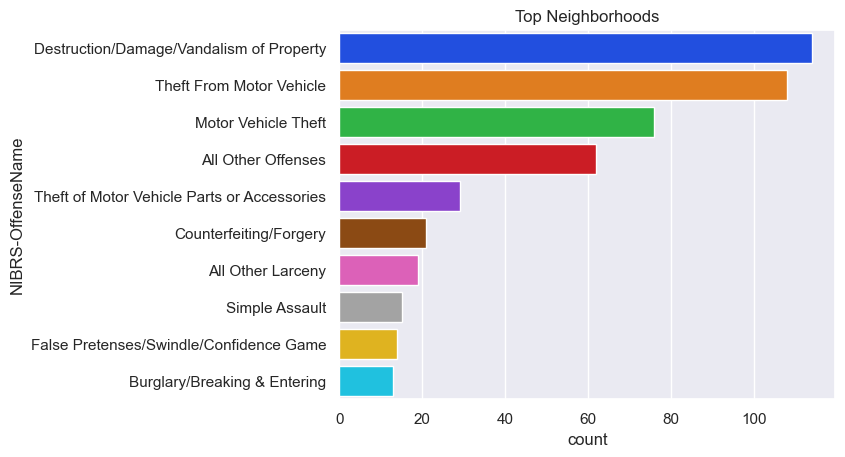

In [65]:
# Create DataFrame of OffenseNames
stl_neighborhood_df = pd.DataFrame(stl_city_master_df.loc[stl_city_master_df['FIN-NEIGHBORHOOD'] == 'The Hill']['NIBRS-OffenseName'].value_counts().reset_index())


stl_city_master_df['NIBRS-OffenseName']
display(stl_neighborhood_df)

# Create Visual for Top Neighborhoods for Crime
sns.barplot(data=stl_neighborhood_df.head(10),
            y='NIBRS-OffenseName',
            x='count', orient='h')

plt.title('Top Neighborhoods')

#### Consolidate Columns 

In [45]:
# Rename Columns
stl_city_df['City'] = stl_city_df['city']
stl_city_df['State'] = stl_city_df['state']
stl_city_df['District'] = stl_city_df['district']
stl_city_df['Latitude'] = stl_city_df['latitude']
stl_city_df['Longitude'] = stl_city_df['longitude']
stl_city_df['Address'] = stl_city_df['incidentlocation']
stl_city_df['ORIG-OffenseName'] = stl_city_df['offense']


# Remove unnecessary columns
stl_city_df = stl_city_df.drop(columns=['inci_id','date_inc','time_inc', 
                                        'offense','nibrs_grp', 'nibrs_code',
                                        'beat','neighborhood', 'city', 'state',
                                        'locationStreet2_Apt', 'zip', 'longitude', 
                                        'latitude', 'district', 'incidentlocation'])

# Restructure Format of Columns
stl_city_df = stl_city_df.loc[:,['Datetime','NIBRS-OffenseName', 'NIBRS-OffenseCategory', 'ORIG-OffenseName', 'Latitude', 
                                 'Longitude' ,'Address', 'City', 'State', 'District', 'Patrol District']]

# Sort by Datetime and Reset Index
stl_city_df = stl_city_df.sort_values(by='Datetime', ascending=True).reset_index(drop=True)

# Show new Clean DataFrame
display(stl_city_df)

Datetime                            NIBRS-OffenseName  \
0     2023-01-01 00:00:00                          Motor Vehicle Theft   
1     2023-01-01 00:00:00  Theft of Motor Vehicle Parts or Accessories   
2     2023-01-01 00:00:00  Theft of Motor Vehicle Parts or Accessories   
3     2023-01-01 00:00:00     Destruction/Damage/Vandalism of Property   
4     2023-01-01 00:00:00                          Theft From Building   
...                   ...                                          ...   
56527 2024-01-02 07:00:00                     Drug/Narcotic Violations   
56528 2024-01-02 08:00:00                        Weapon Law Violations   
56529 2024-01-02 08:00:00     Destruction/Damage/Vandalism of Property   
56530 2024-01-02 11:00:00     Destruction/Damage/Vandalism of Property   
56531 2024-01-02 11:00:00                        Weapon Law Violations   

      NIBRS-OffenseCategory  \
0                  Property   
1                  Property   
2                  Property   
3                  Property   
4                  Property   
...                     ...   
56527               Society   
56528               Society   
56529              Property   
56530              Property   
56531               Society   

                                        ORIG-OffenseName   Latitude  \
0           STEALING - MOTOR VEHICLE/WATERCRAFT/AIRCRAFT  38.607462   
1                         STEALING - CATALYTIC CONVERTER  38.620859   
2                         STEALING - CATALYTIC CONVERTER  38.540744   
3                           PROPERTY DAMAGE - 2ND DEGREE  38.604695   
4      STEALING UNDER $150 (PETTY LARCENY - FROM BUIL...  38.606641   
...                                                  ...        ...   
56527  UNLAWFUL POSSESSION OF A CONTROLLED SUBSTANCE ...  38.568874   
56528  UNLAWFUL USE OF WEAPON - SUBSECTION 9 - SHOOT ...  38.661501   
56529                         PROPERTY DAMAGE 1ST DEGREE  38.661501   
56530                       PROPERTY DAMAGE - 2ND DEGREE  38.644940   
56531      DISCHARGING FIREARM WITHIN CITY (SHOTSPOTTER)  38.682091   

       Longitude                   Address         City State  District  \
0     -90.272190             4988 REBER PL  Saint Louis    MO       2.0   
1     -90.268340  1375 S KINGSHIGHWAY BLVD  Saint Louis    MO       2.0   
2     -90.265115           8512 S BROADWAY  Saint Louis    MO       1.0   
3     -90.296200            3208 WATSON RD  Saint Louis    MO       2.0   
4     -90.223440            2615 VICTOR ST  Saint Louis    MO       3.0   
...          ...                       ...          ...   ...       ...   
56527 -90.255650             3632 BATES ST  Saint Louis    MO       1.0   
56528 -90.218463   3644 NATURAL BRIDGE AVE  Saint Louis    MO       4.0   
56529 -90.218463   3644 NATURAL BRIDGE AVE  Saint Louis    MO       4.0   
56530 -90.274655                UNION BLVD  Saint Louis    MO       6.0   
56531 -90.272244        5738 GOODFELLOW PL  Saint Louis    MO       5.0   

               Patrol District  
0        South Patrol Division  
1        South Patrol Division  
2        South Patrol Division  
3        South Patrol Division  
4      Central Patrol Division  
...                        ...  
56527    South Patrol Division  
56528  Central Patrol Division  
56529  Central Patrol Division  
56530    North Patrol Division  
56531    North Patrol Division  

[56532 rows x 11 columns]

### St. Louis County

In [46]:
stl_county_df

OffenseName OffenseCategory Report Number  \
0      Destruction/Damage/Vandalism Of Property        Property         3-431   
1      Destruction/Damage/Vandalism Of Property        Property          23-1   
2      Destruction/Damage/Vandalism Of Property        Property          23-1   
3      Destruction/Damage/Vandalism Of Property        Property          23-2   
4      Destruction/Damage/Vandalism Of Property        Property          23-3   
...                                         ...             ...           ...   
35135                     Forcible Sex Offenses          Person      23-38975   
35136                     Forcible Sex Offenses          Person      23-42800   
35137                     Forcible Sex Offenses          Person       23-3556   
35138                     Forcible Sex Offenses          Person       23-4274   
35139                     Prostitution Offenses         Society      23-39082   

           reportingJuris            forJuris                  address  \
0        RICHMOND HEIGHTS    RICHMOND HEIGHTS         1107 EAST LINDEN   
1            MOLINE ACRES        MOLINE ACRES          2352 GARDNER DR   
2               LAKESHIRE           LAKESHIRE  10080 SQUIRE MEADOWS DR   
3            MOLINE ACRES        MOLINE ACRES        9838 EDGEFIELD DR   
4                OVERLAND            OVERLAND         9116 LACKLAND RD   
...                   ...                 ...                      ...   
35135  SAINT LOUIS COUNTY  SAINT LOUIS COUNTY                      NaN   
35136  SAINT LOUIS COUNTY         VALLEY PARK                      NaN   
35137            OVERLAND            OVERLAND                      NaN   
35138  SAINT LOUIS COUNTY            WILDWOOD                      NaN   
35139  SAINT LOUIS COUNTY  SAINT LOUIS COUNTY                      NaN   

        latitude  longitude  dtCalledIntoCad   occurred OccDOW  OccMonth  \
0      38.633600 -90.342300  2/27/2023 18:08  2/26/2003    Wed         2   
1      38.749906 -90.247051    1/1/2023 0:04   1/1/2023    Sun         1   
2      38.536756 -90.341975   1/2/2023 11:31   1/2/2023    Mon         1   
3      38.748386 -90.250623    1/1/2023 1:42   1/1/2023    Sun         1   
4      38.699600 -90.358434    1/1/2023 2:03   1/1/2023    Sun         1   
...          ...        ...              ...        ...    ...       ...   
35135        NaN        NaN  10/5/2023 10:42  10/4/2023    Wed        10   
35136        NaN        NaN   11/2/2023 5:33  11/2/2023    Thu        11   
35137        NaN        NaN   12/8/2023 9:00  8/13/2023    Sun         8   
35138        NaN        NaN  1/31/2023 14:02   6/1/2010    Tue         6   
35139        NaN        NaN  10/5/2023 23:00  10/5/2023    Thu        10   

                                    premise  zone                   district  
0                                    CHURCH  3212                 DISTRICT 3  
1                                 RESIDENCE  1133                        NaN  
2                     APARTMENT PARKING LOT  3422                        NaN  
3             STREET/HIGHWAY/SIDEWALK/ALLEY  1133                        NaN  
4      PARKING LOT/GARAGE (NOT RESIDENTIAL)  2200                 SECTOR 103  
...                                     ...   ...                        ...  
35135                             RESIDENCE  5281       WEST COUNTY PRECINCT  
35136                             RESIDENCE  5050       WEST COUNTY PRECINCT  
35137                             RESIDENCE  2260                 SECTOR 101  
35138                             RESIDENCE  5244  CITY OF WILDWOOD PRECINCT  
35139                           HOTEL/MOTEL  2160    CENTRAL COUNTY PRECINCT  

[35140 rows x 15 columns]

#### Map NIBRS Data to DataFrame

In [47]:
# NIBR Mappings for St. Louis County
nibrs_maps_county = { 'Assault, Simple/Other': 'Simple Assault',
                      'Aggravated Assault, Hands/Feet/Fists': 'Aggravated Assault',
                      'Aggravated Assault, Firearm': 'Aggravated Assault',
                      'Aggravated Assault, Other Weapon': 'Aggravated Assault',
                      'Aggravated Assault, Knife/Cutting Instrument': 'Aggravated Assault',
                      'Assault, Intimidation': 'Intimidation',
                      'Burglary': 'Burglary/Breaking & Entering',
                      'Destruction/Damage/Vandalism Of Property': 'Destruction/Damage/Vandalism of Property',
                      'Drug Equipment/Paraphernalia Violations': 'Drug Equipment Violations',
                      'Fraud, Wire': 'Wire Fraud',
                      'Fraud, Welfare': 'Wire Fraud',
                      'Fraud, Credit Card/Automatic Teller Machine': 'Credit Card/Automated Teller Machine Fraud',
                      'Fraud, Identity Theft': 'Impersonation',
                      'Fraud, False Pretenses/Swindle/Confidence Game': 'False Pretenses/Swindle/Confidence Game',
                      'Fraud, Impersonation': 'Impersonation',
                      'Fraud, Hacking/Computer Invasion': 'Impersonation',
                      'Homicide, Murder And Nonnegligent Manslaughter': 'Murder & Nonnegligent Manslaughter',
                      'Homicide, Negligent Manslaughter': 'Negligent Manslaughter',
                      'Abduction/Kidnapping': 'Kidnapping/Abduction',
                      'Larceny': 'All Other Larceny',
                      'Pornography/Obscene Literature And Objects': 'Pornography/Obscene Material',
                      'Prostitution Offenses': 'Prostitution',
                      'Robbery, Other Dangerous Weapon': 'Robbery',
                      'Robbery, Firearm': 'Robbery',
                      'Robbery, Strongarm': 'Robbery',
                      'Robbery, Knife/Cutting Instrument': 'Robbery',
                      'Stolen Property (Buying, Receiving, Possessing)': 'Stolen Property Offenses',
                      'Weapon Law Violations': 'Weapon Law Violations',
                      'Motor Vehicle Theft': 'Motor Vehicle Theft',
                      'Extortion/Blackmail': 'Extortion/Blackmail',
                      'Bribery': 'Bribery',
                      'Drug/Narcotic Violations': 'Drug/Narcotic Violations',
                      'Counterfeiting/Forgery': 'Counterfeiting/Forgery',
                      'Arson': 'Arson',
                      'Embezzlement': 'Embezzlement',
                      'Human Trafficking': 'Kidnapping/Abduction'}

# Map Codes to Values for Offenses & Offense Categories
stl_county_df['NIBRS-OffenseName'] = stl_county_df['OffenseName'].map(nibrs_maps_county)
stl_county_df['NIBRS-OffenseCategory'] = stl_county_df['NIBRS-OffenseName'].map(nibrs_category_maps)

# Show Updated DataFrame
display(stl_county_df.head(3))

OffenseName OffenseCategory Report Number  \
0  Destruction/Damage/Vandalism Of Property        Property         3-431   
1  Destruction/Damage/Vandalism Of Property        Property          23-1   
2  Destruction/Damage/Vandalism Of Property        Property          23-1   

     reportingJuris          forJuris                  address   latitude  \
0  RICHMOND HEIGHTS  RICHMOND HEIGHTS         1107 EAST LINDEN  38.633600   
1      MOLINE ACRES      MOLINE ACRES          2352 GARDNER DR  38.749906   
2         LAKESHIRE         LAKESHIRE  10080 SQUIRE MEADOWS DR  38.536756   

   longitude  dtCalledIntoCad   occurred OccDOW  OccMonth  \
0 -90.342300  2/27/2023 18:08  2/26/2003    Wed         2   
1 -90.247051    1/1/2023 0:04   1/1/2023    Sun         1   
2 -90.341975   1/2/2023 11:31   1/2/2023    Mon         1   

                 premise  zone    district  \
0                 CHURCH  3212  DISTRICT 3   
1              RESIDENCE  1133         NaN   
2  APARTMENT PARKING LOT  3422         NaN   

                          NIBRS-OffenseName NIBRS-OffenseCategory  
0  Destruction/Damage/Vandalism of Property              Property  
1  Destruction/Damage/Vandalism of Property              Property  
2  Destruction/Damage/Vandalism of Property              Property

#### Convert to DateTime Format

In [48]:
# Convert the data it was called in to DateTime Format
stl_county_df['Datetime'] = pd.to_datetime(stl_county_df['dtCalledIntoCad'])

# Show the times
stl_county_df['Datetime'].head(3)

0   2023-02-27 18:08:00
1   2023-01-01 00:04:00
2   2023-01-02 11:31:00
Name: Datetime, dtype: datetime64[ns]

#### Consolidate Columns 

In [49]:
stl_county_df.columns

Index(['OffenseName', 'OffenseCategory', 'Report Number', 'reportingJuris',
       'forJuris', 'address', 'latitude', 'longitude', 'dtCalledIntoCad',
       'occurred', 'OccDOW', 'OccMonth', 'premise', 'zone', 'district',
       'NIBRS-OffenseName', 'NIBRS-OffenseCategory', 'Datetime'],
      dtype='object')

In [50]:
# Rename Columns
stl_county_df['State'] = 'MO'
stl_county_df['City'] = stl_county_df['forJuris']
stl_county_df['Address'] = stl_county_df['address']
stl_county_df['Patrol District'] = stl_county_df['district']
stl_county_df['Latitude'] = stl_county_df['latitude']
stl_county_df['Longitude'] = stl_county_df['longitude']
stl_county_df['ORIG-OffenseName'] = stl_county_df['OffenseName']

# Drop Unnecessary Columns
stl_county_df = stl_county_df.drop(columns=['Report Number', 'reportingJuris', 'forJuris',
                                            'address', 'latitude','longitude', 'dtCalledIntoCad',
                                            'occurred','OccDOW','OccMonth','premise', 'zone', 'district',
                                            'OffenseName'])

# ReStructure Columns
stl_county_df = stl_county_df.loc[:,['Datetime','NIBRS-OffenseName', 'NIBRS-OffenseCategory', 'ORIG-OffenseName', 'Latitude', 
                                     'Longitude' ,'Address', 'City', 'State', 'Patrol District']]

# Sort DataFrame by Datetime
stl_county_df = stl_county_df.sort_values(by='Datetime', ascending=True).reset_index(drop=True)

# Show Cleaned DataFrame
display(stl_county_df)
infoOut(stl_county_df)

Datetime                         NIBRS-OffenseName  \
0     2023-01-01 00:04:00  Destruction/Damage/Vandalism of Property   
1     2023-01-01 00:08:00  Destruction/Damage/Vandalism of Property   
2     2023-01-01 00:14:00  Destruction/Damage/Vandalism of Property   
3     2023-01-01 00:17:00                     Weapon Law Violations   
4     2023-01-01 00:18:00  Destruction/Damage/Vandalism of Property   
...                   ...                                       ...   
35135 2023-12-31 21:10:00                         All Other Larceny   
35136 2023-12-31 21:47:00                        Aggravated Assault   
35137 2023-12-31 23:15:00  Destruction/Damage/Vandalism of Property   
35138 2023-12-31 23:25:00  Destruction/Damage/Vandalism of Property   
35139 2023-12-31 23:59:00                     Weapon Law Violations   

      NIBRS-OffenseCategory                          ORIG-OffenseName  \
0                  Property  Destruction/Damage/Vandalism Of Property   
1                  Property  Destruction/Damage/Vandalism Of Property   
2                  Property  Destruction/Damage/Vandalism Of Property   
3                   Society                     Weapon Law Violations   
4                  Property  Destruction/Damage/Vandalism Of Property   
...                     ...                                       ...   
35135              Property                                   Larceny   
35136                Person      Aggravated Assault, Hands/Feet/Fists   
35137              Property  Destruction/Damage/Vandalism Of Property   
35138              Property  Destruction/Damage/Vandalism Of Property   
35139               Society                     Weapon Law Violations   

        Latitude  Longitude               Address                City State  \
0      38.749906 -90.247051       2352 GARDNER DR        MOLINE ACRES    MO   
1      38.730861 -90.256748      2460 SHANNON AVE            JENNINGS    MO   
2      38.796647 -90.276259    12543 BIELEFELD CT          BLACK JACK    MO   
3      38.702187 -90.353775     2439 GOTHLAND AVE            OVERLAND    MO   
4      38.823901 -90.347436    2102 MILLVALLEY DR  SAINT LOUIS COUNTY    MO   
...          ...        ...                   ...                 ...   ...   
35135  38.748874 -90.253394      2202 CHAMBERS RD  SAINT LOUIS COUNTY    MO   
35136  38.645681 -90.556947   1511 BAXTER LANE CT        CHESTERFIELD    MO   
35137  38.722865 -90.304584  1790 S FLORISSANT RD         COOL VALLEY    MO   
35138  38.826100 -90.344852     2135 KINGSFORD DR  SAINT LOUIS COUNTY    MO   
35139  38.709278 -90.373786     2815 TENNYSON AVE            OVERLAND    MO   

                 Patrol District  
0                            NaN  
1      CITY OF JENNINGS PRECINCT  
2          NORTH COUNTY PRECINCT  
3                     SECTOR 103  
4          NORTH COUNTY PRECINCT  
...                          ...  
35135      NORTH COUNTY PRECINCT  
35136                 DISTRICT 4  
35137                        NaN  
35138      NORTH COUNTY PRECINCT  
35139                 SECTOR 101  

[35140 rows x 10 columns]

Column  Non-Null Count  NULL Count           Dtype
0               Datetime           35140           0  datetime64[ns]
1      NIBRS-OffenseName           34808         332          object
2  NIBRS-OffenseCategory           34808         332          object
3       ORIG-OffenseName           35140           0          object
4               Latitude           34681         459         float64
5              Longitude           34681         459         float64
6                Address           34681         459          object
7                   City           35140           0          object
8                  State           35140           0          object
9        Patrol District           28438        6702          object

## Exploritory Data Analysis

### Cleaned DataFrames

In [51]:
# Show St. Louis City 
print('St. Louis City')
print('-' * 20)
display(stl_city_df)

# Show St. Louis County
print('\n\nSt. Louis County')
print('-' * 20)
display(stl_county_df)

St. Louis City
--------------------


Datetime                            NIBRS-OffenseName  \
0     2023-01-01 00:00:00                          Motor Vehicle Theft   
1     2023-01-01 00:00:00  Theft of Motor Vehicle Parts or Accessories   
2     2023-01-01 00:00:00  Theft of Motor Vehicle Parts or Accessories   
3     2023-01-01 00:00:00     Destruction/Damage/Vandalism of Property   
4     2023-01-01 00:00:00                          Theft From Building   
...                   ...                                          ...   
56527 2024-01-02 07:00:00                     Drug/Narcotic Violations   
56528 2024-01-02 08:00:00                        Weapon Law Violations   
56529 2024-01-02 08:00:00     Destruction/Damage/Vandalism of Property   
56530 2024-01-02 11:00:00     Destruction/Damage/Vandalism of Property   
56531 2024-01-02 11:00:00                        Weapon Law Violations   

      NIBRS-OffenseCategory  \
0                  Property   
1                  Property   
2                  Property   
3                  Property   
4                  Property   
...                     ...   
56527               Society   
56528               Society   
56529              Property   
56530              Property   
56531               Society   

                                        ORIG-OffenseName   Latitude  \
0           STEALING - MOTOR VEHICLE/WATERCRAFT/AIRCRAFT  38.607462   
1                         STEALING - CATALYTIC CONVERTER  38.620859   
2                         STEALING - CATALYTIC CONVERTER  38.540744   
3                           PROPERTY DAMAGE - 2ND DEGREE  38.604695   
4      STEALING UNDER $150 (PETTY LARCENY - FROM BUIL...  38.606641   
...                                                  ...        ...   
56527  UNLAWFUL POSSESSION OF A CONTROLLED SUBSTANCE ...  38.568874   
56528  UNLAWFUL USE OF WEAPON - SUBSECTION 9 - SHOOT ...  38.661501   
56529                         PROPERTY DAMAGE 1ST DEGREE  38.661501   
56530                       PROPERTY DAMAGE - 2ND DEGREE  38.644940   
56531      DISCHARGING FIREARM WITHIN CITY (SHOTSPOTTER)  38.682091   

       Longitude                   Address         City State  District  \
0     -90.272190             4988 REBER PL  Saint Louis    MO       2.0   
1     -90.268340  1375 S KINGSHIGHWAY BLVD  Saint Louis    MO       2.0   
2     -90.265115           8512 S BROADWAY  Saint Louis    MO       1.0   
3     -90.296200            3208 WATSON RD  Saint Louis    MO       2.0   
4     -90.223440            2615 VICTOR ST  Saint Louis    MO       3.0   
...          ...                       ...          ...   ...       ...   
56527 -90.255650             3632 BATES ST  Saint Louis    MO       1.0   
56528 -90.218463   3644 NATURAL BRIDGE AVE  Saint Louis    MO       4.0   
56529 -90.218463   3644 NATURAL BRIDGE AVE  Saint Louis    MO       4.0   
56530 -90.274655                UNION BLVD  Saint Louis    MO       6.0   
56531 -90.272244        5738 GOODFELLOW PL  Saint Louis    MO       5.0   

               Patrol District  
0        South Patrol Division  
1        South Patrol Division  
2        South Patrol Division  
3        South Patrol Division  
4      Central Patrol Division  
...                        ...  
56527    South Patrol Division  
56528  Central Patrol Division  
56529  Central Patrol Division  
56530    North Patrol Division  
56531    North Patrol Division  

[56532 rows x 11 columns]



St. Louis County
--------------------


Datetime                         NIBRS-OffenseName  \
0     2023-01-01 00:04:00  Destruction/Damage/Vandalism of Property   
1     2023-01-01 00:08:00  Destruction/Damage/Vandalism of Property   
2     2023-01-01 00:14:00  Destruction/Damage/Vandalism of Property   
3     2023-01-01 00:17:00                     Weapon Law Violations   
4     2023-01-01 00:18:00  Destruction/Damage/Vandalism of Property   
...                   ...                                       ...   
35135 2023-12-31 21:10:00                         All Other Larceny   
35136 2023-12-31 21:47:00                        Aggravated Assault   
35137 2023-12-31 23:15:00  Destruction/Damage/Vandalism of Property   
35138 2023-12-31 23:25:00  Destruction/Damage/Vandalism of Property   
35139 2023-12-31 23:59:00                     Weapon Law Violations   

      NIBRS-OffenseCategory                          ORIG-OffenseName  \
0                  Property  Destruction/Damage/Vandalism Of Property   
1                  Property  Destruction/Damage/Vandalism Of Property   
2                  Property  Destruction/Damage/Vandalism Of Property   
3                   Society                     Weapon Law Violations   
4                  Property  Destruction/Damage/Vandalism Of Property   
...                     ...                                       ...   
35135              Property                                   Larceny   
35136                Person      Aggravated Assault, Hands/Feet/Fists   
35137              Property  Destruction/Damage/Vandalism Of Property   
35138              Property  Destruction/Damage/Vandalism Of Property   
35139               Society                     Weapon Law Violations   

        Latitude  Longitude               Address                City State  \
0      38.749906 -90.247051       2352 GARDNER DR        MOLINE ACRES    MO   
1      38.730861 -90.256748      2460 SHANNON AVE            JENNINGS    MO   
2      38.796647 -90.276259    12543 BIELEFELD CT          BLACK JACK    MO   
3      38.702187 -90.353775     2439 GOTHLAND AVE            OVERLAND    MO   
4      38.823901 -90.347436    2102 MILLVALLEY DR  SAINT LOUIS COUNTY    MO   
...          ...        ...                   ...                 ...   ...   
35135  38.748874 -90.253394      2202 CHAMBERS RD  SAINT LOUIS COUNTY    MO   
35136  38.645681 -90.556947   1511 BAXTER LANE CT        CHESTERFIELD    MO   
35137  38.722865 -90.304584  1790 S FLORISSANT RD         COOL VALLEY    MO   
35138  38.826100 -90.344852     2135 KINGSFORD DR  SAINT LOUIS COUNTY    MO   
35139  38.709278 -90.373786     2815 TENNYSON AVE            OVERLAND    MO   

                 Patrol District  
0                            NaN  
1      CITY OF JENNINGS PRECINCT  
2          NORTH COUNTY PRECINCT  
3                     SECTOR 103  
4          NORTH COUNTY PRECINCT  
...                          ...  
35135      NORTH COUNTY PRECINCT  
35136                 DISTRICT 4  
35137                        NaN  
35138      NORTH COUNTY PRECINCT  
35139                 SECTOR 101  

[35140 rows x 10 columns]

### Concatenate DataFrames

In [52]:
# Concatenate DataFrames
stl_crime_df = pd.concat([stl_city_df, stl_county_df])

# Sort DataFrame by Datetime
stl_crime_df = stl_crime_df.sort_values(by='Datetime', ascending=True).reset_index(drop=True)

# Display Merged DataFrames
display(stl_crime_df)

Datetime                            NIBRS-OffenseName  \
0     2023-01-01 00:00:00                          Motor Vehicle Theft   
1     2023-01-01 00:00:00     Destruction/Damage/Vandalism of Property   
2     2023-01-01 00:00:00                          Motor Vehicle Theft   
3     2023-01-01 00:00:00  Theft of Motor Vehicle Parts or Accessories   
4     2023-01-01 00:00:00                                 Intimidation   
...                   ...                                          ...   
91667 2024-01-02 07:00:00                     Drug/Narcotic Violations   
91668 2024-01-02 08:00:00                        Weapon Law Violations   
91669 2024-01-02 08:00:00     Destruction/Damage/Vandalism of Property   
91670 2024-01-02 11:00:00                        Weapon Law Violations   
91671 2024-01-02 11:00:00     Destruction/Damage/Vandalism of Property   

      NIBRS-OffenseCategory  \
0                  Property   
1                  Property   
2                  Property   
3                  Property   
4                    Person   
...                     ...   
91667               Society   
91668               Society   
91669              Property   
91670               Society   
91671              Property   

                                        ORIG-OffenseName   Latitude  \
0           STEALING - MOTOR VEHICLE/WATERCRAFT/AIRCRAFT  38.607462   
1      PROPERTY DAMAGE - 1ST DEGREE - DAMAGE TO MOTOR...  38.629904   
2      STEALING - MOTOR VEHICLE/WATERCRAFT/AIRCRAFT &...  38.629904   
3      STEALING UNDER $150 (PETTY LARCENY-MOTOR VEH P...  38.580073   
4                                HARASSMENT - 1ST DEGREE  38.637207   
...                                                  ...        ...   
91667  UNLAWFUL POSSESSION OF A CONTROLLED SUBSTANCE ...  38.568874   
91668  UNLAWFUL USE OF WEAPON - SUBSECTION 9 - SHOOT ...  38.661501   
91669                         PROPERTY DAMAGE 1ST DEGREE  38.661501   
91670      DISCHARGING FIREARM WITHIN CITY (SHOTSPOTTER)  38.682091   
91671                       PROPERTY DAMAGE - 2ND DEGREE  38.644940   

       Longitude                  Address         City State  District  \
0     -90.272190            4988 REBER PL  Saint Louis    MO       2.0   
1     -90.192264         411 N 8TH STREET  Saint Louis    MO       4.0   
2     -90.192264         411 N 8TH STREET  Saint Louis    MO       4.0   
3     -90.284780          5175 GOETHE AVE  Saint Louis    MO       1.0   
4     -90.213445              2601 DELMAR  Saint Louis    MO       4.0   
...          ...                      ...          ...   ...       ...   
91667 -90.255650            3632 BATES ST  Saint Louis    MO       1.0   
91668 -90.218463  3644 NATURAL BRIDGE AVE  Saint Louis    MO       4.0   
91669 -90.218463  3644 NATURAL BRIDGE AVE  Saint Louis    MO       4.0   
91670 -90.272244       5738 GOODFELLOW PL  Saint Louis    MO       5.0   
91671 -90.274655               UNION BLVD  Saint Louis    MO       6.0   

               Patrol District  
0        South Patrol Division  
1      Central Patrol Division  
2      Central Patrol Division  
3        South Patrol Division  
4      Central Patrol Division  
...                        ...  
91667    South Patrol Division  
91668  Central Patrol Division  
91669  Central Patrol Division  
91670    North Patrol Division  
91671    North Patrol Division  

[91672 rows x 11 columns]

In [53]:
infoOut(stl_crime_df)

Column  Non-Null Count  NULL Count           Dtype
0                Datetime           91672           0  datetime64[ns]
1       NIBRS-OffenseName           91222         450          object
2   NIBRS-OffenseCategory           91222         450          object
3        ORIG-OffenseName           91672           0          object
4                Latitude           91213         459         float64
5               Longitude           91213         459         float64
6                 Address           91213         459          object
7                    City           91672           0          object
8                   State           91672           0          object
9                District           56532       35140         float64
10        Patrol District           84894        6778          object

### Visualizations

Text(0.5, 1.0, 'Top 10 Offenses')

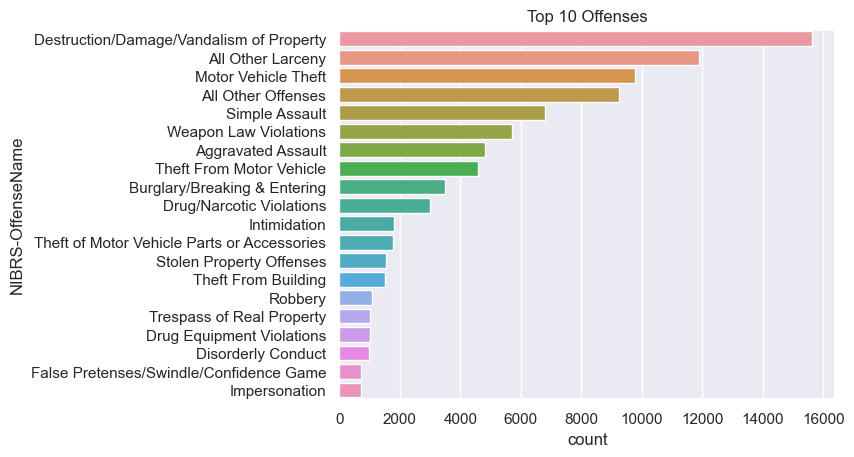

In [54]:
# Create DataFrame of OffenseNames
stl_offense_df = pd.DataFrame(stl_crime_df['NIBRS-OffenseName'].value_counts().reset_index())

sns.barplot(data=stl_offense_df.head(20),
            y='NIBRS-OffenseName',
            x='count', orient='h')

plt.title('Top 10 Offenses')

NIBRS-OffenseCategory  count
0                      Property  55527
1                        Person  14149
2                       Society  12301
3  Person, Property, or Society   9239
4           Person/ Not a Crime      6

<Axes: xlabel='count', ylabel='NIBRS-OffenseCategory'>

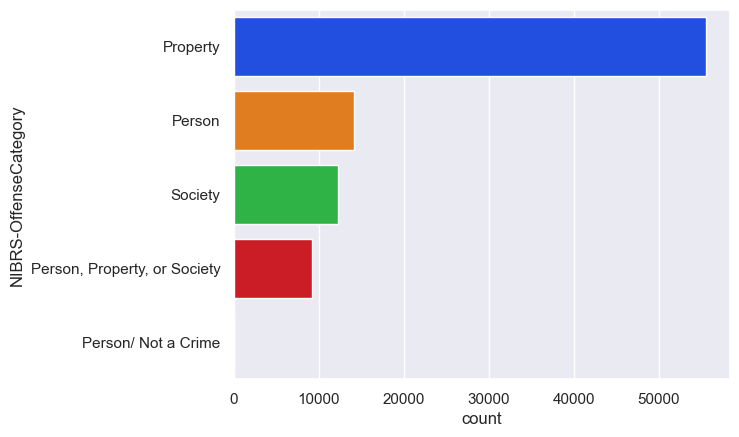

In [55]:
stl_offenseCat_df = pd.DataFrame(stl_crime_df['NIBRS-OffenseCategory'].value_counts().reset_index())

display(stl_offenseCat_df)

sns.barplot(data=stl_offenseCat_df.head(20),
            y='NIBRS-OffenseCategory',
            x='count', orient='h')

In [56]:
display(stl_crime_df[stl_crime_df['OffenseName'].str.contains(offenseName, na=False)]['OffenseName'].value_counts().reset_index())

sns.barplot(data=stl_crime_df[stl_crime_df['OffenseName'].str.contains(offenseName, na=False)]['OffenseName'].value_counts().reset_index(),
            y='OffenseName',
            x='count', orient='h')

KeyError: 'OffenseName'

In [ ]:
stl_crime_city_df = pd.DataFrame(stl_crime_df['City'].value_counts().reset_index())
stl_noCounty_df = stl_crime_city_df.loc[stl_crime_city_df['City'] != 'SAINT LOUIS COUNTY']
stl_noCityCounty_df = stl_noCounty_df.loc[stl_noCounty_df['City'] != 'Saint Louis']

display(stl_noCityCounty_df)

sns.barplot(data=stl_noCityCounty_df.head(10),
            y='City',
            x='count', orient='h')

In [ ]:
stl_crime_district_df = pd.DataFrame(stl_crime_df['Patrol District'].value_counts().reset_index())
display(stl_crime_district_df)

sns.barplot(data=stl_crime_district_df.head(10),
            y='Patrol District',
            x='count', orient='h')

## Geographical Distribution

In [ ]:
stl_crime_df

In [ ]:
fig = px.scatter_mapbox(stl_crime_df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Address",
                        hover_data=['NIBRS-OffenseName', 'Address'],
                        color='NIBRS-OffenseName',
                        #color_continuous_scale=px.colors.qualitative,
                        zoom=10, 
                        height=900,
                        width=1600)


# Different MapBox Styles
# carto-darkmatter
# open-street-map
# carto-positron

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()